In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#Dữ liệu giá vàng

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/gold_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                 1307.018690
1     2018-01-02                 1319.827953
2     2018-01-03                 1311.501862
3     2018-01-04                 1321.635371
4     2018-01-05                 1319.589185
...          ...                         ...
2247  2024-02-26                 2031.609404
2248  2024-02-27                 2033.313814
2249  2024-02-28                 2032.653770
2250  2024-02-29                 2036.199141
2251  2024-03-01                 2044.591310

[2252 rows x 2 columns]


Vẽ biểu đồ plot cho dữ liệu

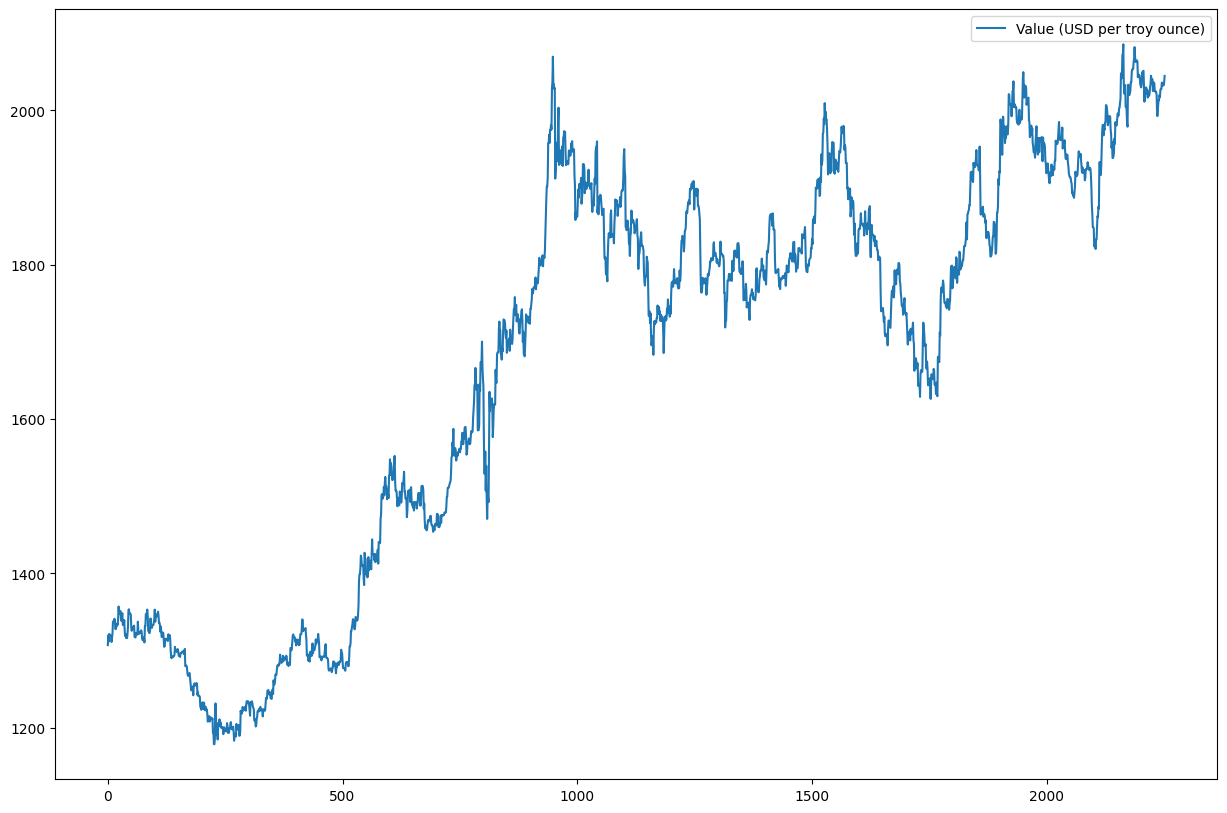

In [ ]:
df.plot(figsize=(15,10))
plt.show()

Thêm index cho dữ liệu

In [ ]:
df.index += 1
df

,Date,Value (USD per troy ounce)
1,2018-01-01,1307.018690
2,2018-01-02,1319.827953
3,2018-01-03,1311.501862
4,2018-01-04,1321.635371
5,2018-01-05,1319.589185
...,...,...
2248,2024-02-26,2031.609404
2249,2024-02-27,2033.313814
2250,2024-02-28,2032.653770
2251,2024-02-29,2036.199141


In [ ]:
# Tạo một DataFrame mới từ DataFrame hiện có mà không có cột 'Date'
new_df = df.drop(columns=['Date'])

# In ra DataFrame mới
print(new_df)

      Value (USD per troy ounce)
1                    1307.018690
2                    1319.827953
3                    1311.501862
4                    1321.635371
5                    1319.589185
...                          ...
2248                 2031.609404
2249                 2033.313814
2250                 2032.653770
2251                 2036.199141
2252                 2044.591310

[2252 rows x 1 columns]


## Chia dữ liệu train, test 8:2

In [ ]:
train = new_df.iloc[:1800]
test = new_df.iloc[1800:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                    1307.018690
 2                    1319.827953
 3                    1311.501862
 4                    1321.635371
 5                    1319.589185
 ...                          ...
 1796                 1776.954850
 1797                 1797.905045
 1798                 1797.905045
 1799                 1798.825151
 1800                 1769.410119
 
 [1800 rows x 1 columns],
       Value (USD per troy ounce)
 1801                 1772.210045
 1802                 1787.139849
 1803                 1789.106560
 1804                 1797.159948
 1805                 1796.469363
 ...                          ...
 2248                 2031.609404
 2249                 2033.313814
 2250                 2032.653770
 2251                 2036.199141
 2252                 2044.591310
 
 [452 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.4
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
1801,1772.210045,1781.988761
1802,1787.139849,1781.988761
1803,1789.106560,1781.988761
1804,1797.159948,1781.988761
1805,1796.469363,1781.988761
...,...,...
2248,2031.609404,1781.988761
2249,2033.313814,1781.988761
2250,2032.653770,1781.988761
2251,2036.199141,1781.988761


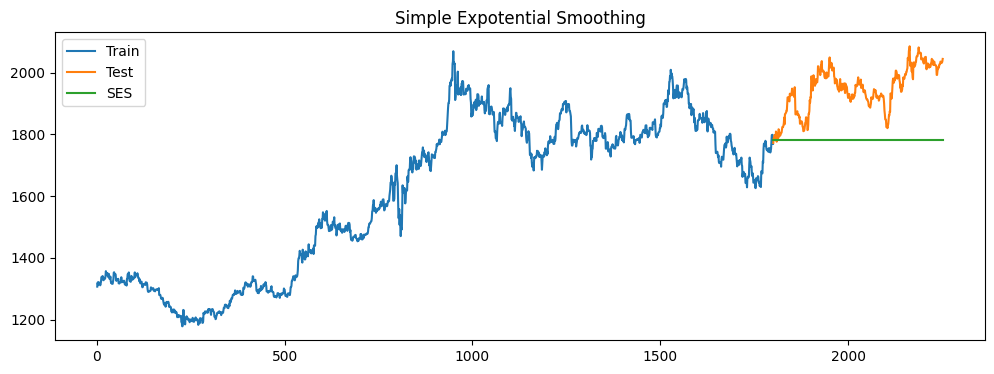

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

1801    1781.988761
1802    1781.988761
1803    1781.988761
1804    1781.988761
1805    1781.988761
           ...     
2278    1781.988761
2279    1781.988761
2280    1781.988761
2281    1781.988761
2282    1781.988761
Length: 482, dtype: float64

Hàm tính RMSE, MAPE, MAE

In [ ]:
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((np.array(actual) - np.array(forecast)) ** 2))

def calculate_mape(actual, forecast):
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

def calculate_mae(actual, forecast):
    return np.mean(np.abs(np.array(actual) - np.array(forecast)))

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 180.8965617438001
MAPE: 8.393899838394455%
MAE: 165.98891535732946


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
def SES(train, test):
  alpha_values = np.arange(0.01, 1.0, 0.01)
  model1 = SimpleExpSmoothing(train)
  test_data = test.copy()
  rmse_scores = {}
  mape_scores = {}
  mae_scores = {}
  for alpha in alpha_values:
    fit1 = model1.fit(smoothing_level = alpha, optimized = False)
    test_data['test_data_forecast'] = fit1.forecast(len(test))
    rmse = calculate_rmse(test, test_data['test_data_forecast'])
    rmse_scores[alpha] = rmse
    mape = calculate_mape(test, test_data['test_data_forecast'])
    mape_scores[alpha] = mape
    mae = calculate_mae(test, test_data['test_data_forecast'])
    mae_scores[alpha] = mae
  best_alpha1 = min(rmse_scores, key=rmse_scores.get)
  print(f'Best alpha for RMSE: {best_alpha1}, RMSE: {rmse_scores[best_alpha1]}')
  best_alpha2 = min(mape_scores, key=mape_scores.get)
  print(f'Best alpha for MAPE: {best_alpha2}, MAPE: {mape_scores[best_alpha2]}')
  best_alpha3 = min(mae_scores, key=mae_scores.get)
  print(f'Best alpha for MAE: {best_alpha3}, MAE: {mae_scores[best_alpha3]}')


SES(train, test)

Best alpha for RMSE: 0.44, RMSE: 180.79031501597058
Best alpha for MAPE: 0.44, MAPE: 8.388002286222987
Best alpha for MAE: 0.44, MAE: 165.8740979300906


## Chia dữ liệu train, test 9:1

In [ ]:
train = new_df.iloc[:2026]
test = new_df.iloc[2026:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                    1307.018690
 2                    1319.827953
 3                    1311.501862
 4                    1321.635371
 5                    1319.589185
 ...                          ...
 2022                 1956.068271
 2023                 1956.255773
 2024                 1957.118745
 2025                 1963.928139
 2026                 1975.659480
 
 [2026 rows x 1 columns],
       Value (USD per troy ounce)
 2027                 1984.886282
 2028                 1972.403705
 2029                 1961.765966
 2030                 1962.060037
 2031                 1961.391191
 ...                          ...
 2248                 2031.609404
 2249                 2033.313814
 2250                 2032.653770
 2251                 2036.199141
 2252                 2044.591310
 
 [226 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.4
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
2027,1984.886282,1965.338817
2028,1972.403705,1965.338817
2029,1961.765966,1965.338817
2030,1962.060037,1965.338817
2031,1961.391191,1965.338817
...,...,...
2248,2031.609404,1965.338817
2249,2033.313814,1965.338817
2250,2032.653770,1965.338817
2251,2036.199141,1965.338817


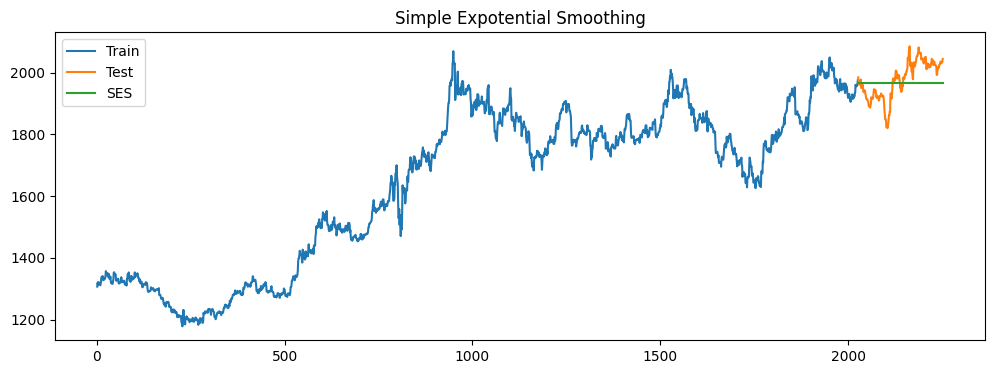

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

2027    1965.338817
2028    1965.338817
2029    1965.338817
2030    1965.338817
2031    1965.338817
           ...     
2278    1965.338817
2279    1965.338817
2280    1965.338817
2281    1965.338817
2282    1965.338817
Length: 256, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 61.89936237662338
MAPE: 2.699100417725868%
MAE: 53.277551729718404


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.99, RMSE: 60.947484487482065
Best alpha for MAPE: 0.99, MAPE: 2.649418563371215
Best alpha for MAE: 0.99, MAE: 52.026202341965025


##Chia dữ liệu train, test 7:3

In [ ]:
train = new_df.iloc[:1576]
test = new_df.iloc[1576:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                    1307.018690
 2                    1319.827953
 3                    1311.501862
 4                    1321.635371
 5                    1319.589185
 ...                          ...
 1572                 1952.159977
 1573                 1931.529967
 1574                 1931.640032
 1575                 1931.834822
 1576                 1898.797871
 
 [1576 rows x 1 columns],
       Value (USD per troy ounce)
 1577                 1900.329973
 1578                 1884.729918
 1579                 1894.049880
 1580                 1896.960159
 1581                 1896.960159
 ...                          ...
 2248                 2031.609404
 2249                 2033.313814
 2250                 2032.653770
 2251                 2036.199141
 2252                 2044.591310
 
 [676 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.4
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
1577,1900.329973,1921.883121
1578,1884.729918,1921.883121
1579,1894.049880,1921.883121
1580,1896.960159,1921.883121
1581,1896.960159,1921.883121
...,...,...
2248,2031.609404,1921.883121
2249,2033.313814,1921.883121
2250,2032.653770,1921.883121
2251,2036.199141,1921.883121


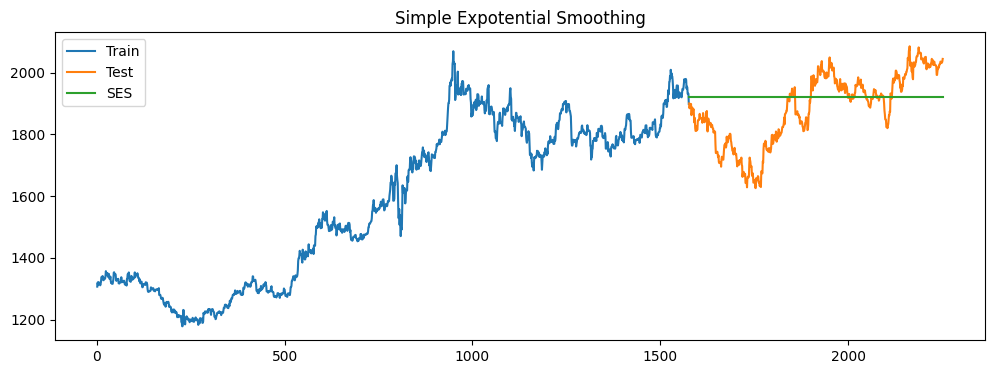

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

1577    1921.883121
1578    1921.883121
1579    1921.883121
1580    1921.883121
1581    1921.883121
           ...     
2278    1921.883121
2279    1921.883121
2280    1921.883121
2281    1921.883121
2282    1921.883121
Length: 706, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 121.1651201315711
MAPE: 5.349583741058535%
MAE: 97.2094802233904


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.01, RMSE: 115.80859924327704
Best alpha for MAPE: 0.99, MAPE: 5.293744898676456
Best alpha for MAE: 0.55, MAE: 96.91048680029583


#Dữ liệu giá bạc

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/silver_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                   16.993771
1     2018-01-02                   17.196475
2     2018-01-03                   17.112426
3     2018-01-04                   17.200338
4     2018-01-05                   17.220985
...          ...                         ...
2247  2024-02-26                   22.800718
2248  2024-02-27                   22.558054
2249  2024-02-28                   22.486938
2250  2024-02-29                   22.507808
2251  2024-03-01                   22.676529

[2252 rows x 2 columns]


Vẽ biểu đồ plot cho dữ liệu

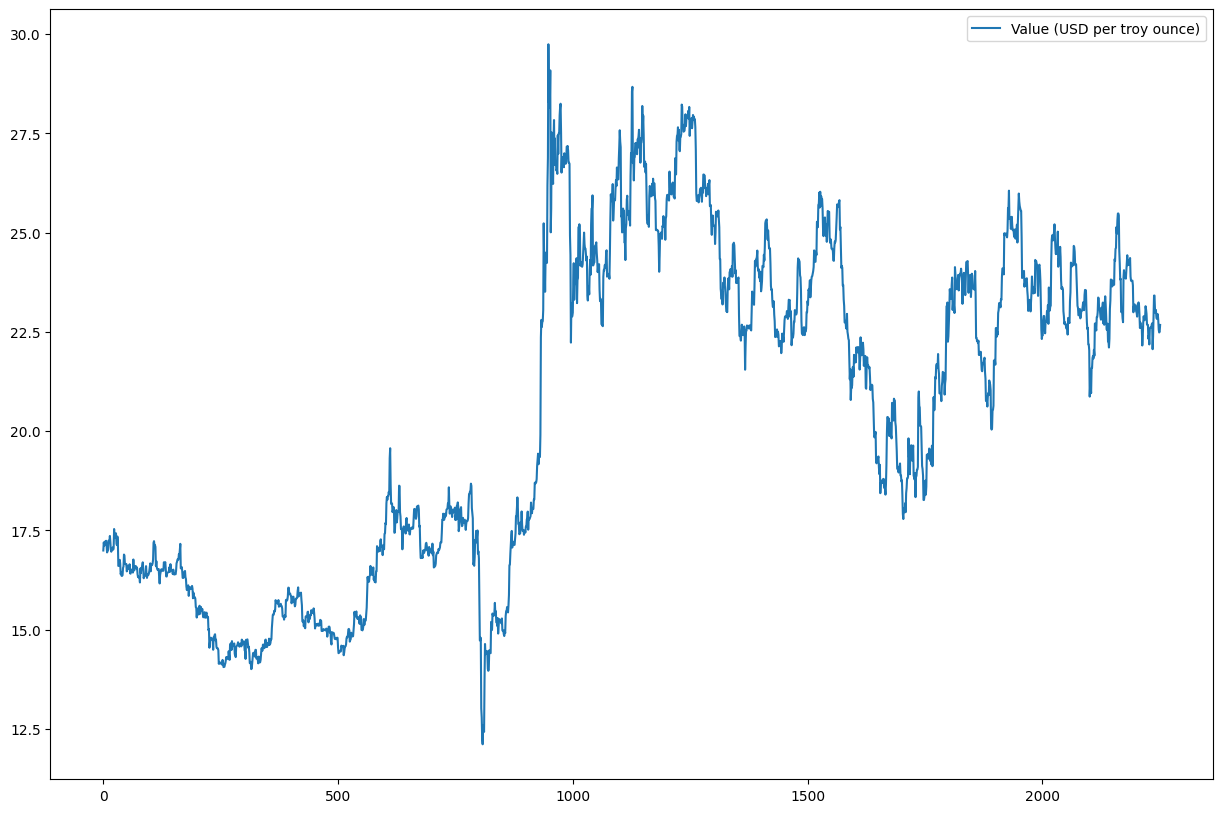

In [ ]:
df.plot(figsize=(15,10))
plt.show()

Thêm index cho dữ liệu

In [ ]:
df.index += 1
df

,Date,Value (USD per troy ounce)
1,2018-01-01,16.993771
2,2018-01-02,17.196475
3,2018-01-03,17.112426
4,2018-01-04,17.200338
5,2018-01-05,17.220985
...,...,...
2248,2024-02-26,22.800718
2249,2024-02-27,22.558054
2250,2024-02-28,22.486938
2251,2024-02-29,22.507808


In [ ]:
# Tạo một DataFrame mới từ DataFrame hiện có mà không có cột 'Date'
new_df = df.drop(columns=['Date'])

# In ra DataFrame mới
print(new_df)

      Value (USD per troy ounce)
1                      16.993771
2                      17.196475
3                      17.112426
4                      17.200338
5                      17.220985
...                          ...
2248                   22.800718
2249                   22.558054
2250                   22.486938
2251                   22.507808
2252                   22.676529

[2252 rows x 1 columns]


## Chia dữ liệu train, test 8:2

In [ ]:
train = new_df.iloc[:1800]
test = new_df.iloc[1800:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                      16.993771
 2                      17.196475
 3                      17.112426
 4                      17.200338
 5                      17.220985
 ...                          ...
 1796                   22.291000
 1797                   23.147500
 1798                   23.143000
 1799                   23.241821
 1800                   22.254150
 
 [1800 rows x 1 columns],
       Value (USD per troy ounce)
 1801                   22.390700
 1802                   22.716200
 1803                   23.084831
 1804                   23.577019
 1805                   23.432493
 ...                          ...
 2248                   22.800718
 2249                   22.558054
 2250                   22.486938
 2251                   22.507808
 2252                   22.676529
 
 [452 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.4
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
1801,22.390700,22.62006
1802,22.716200,22.62006
1803,23.084831,22.62006
1804,23.577019,22.62006
1805,23.432493,22.62006
...,...,...
2248,22.800718,22.62006
2249,22.558054,22.62006
2250,22.486938,22.62006
2251,22.507808,22.62006


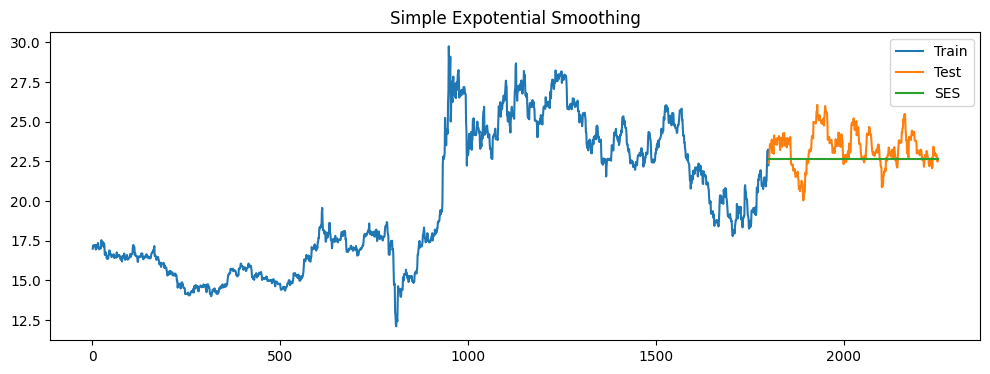

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

1801    22.62006
1802    22.62006
1803    22.62006
1804    22.62006
1805    22.62006
          ...   
2278    22.62006
2279    22.62006
2280    22.62006
2281    22.62006
2282    22.62006
Length: 482, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 1.3078754851650638
MAPE: 4.390960831395235%
MAE: 1.0436143699698115


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.48000000000000004, RMSE: 1.2972027842885412
Best alpha for MAPE: 0.48000000000000004, MAPE: 4.346368710071722
Best alpha for MAE: 0.48000000000000004, MAE: 1.0326798772160322


## Chia dữ liệu train, test 9:1

In [ ]:
train = new_df.iloc[:2026]
test = new_df.iloc[2026:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                      16.993771
 2                      17.196475
 3                      17.112426
 4                      17.200338
 5                      17.220985
 ...                          ...
 2022                   24.934930
 2023                   24.930684
 2024                   24.806947
 2025                   24.901517
 2026                   25.018387
 
 [2026 rows x 1 columns],
       Value (USD per troy ounce)
 2027                   25.211325
 2028                   24.862492
 2029                   24.602867
 2030                   24.460755
 2031                   24.680986
 ...                          ...
 2248                   22.800718
 2249                   22.558054
 2250                   22.486938
 2251                   22.507808
 2252                   22.676529
 
 [226 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.4
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
2027,25.211325,24.874525
2028,24.862492,24.874525
2029,24.602867,24.874525
2030,24.460755,24.874525
2031,24.680986,24.874525
...,...,...
2248,22.800718,24.874525
2249,22.558054,24.874525
2250,22.486938,24.874525
2251,22.507808,24.874525


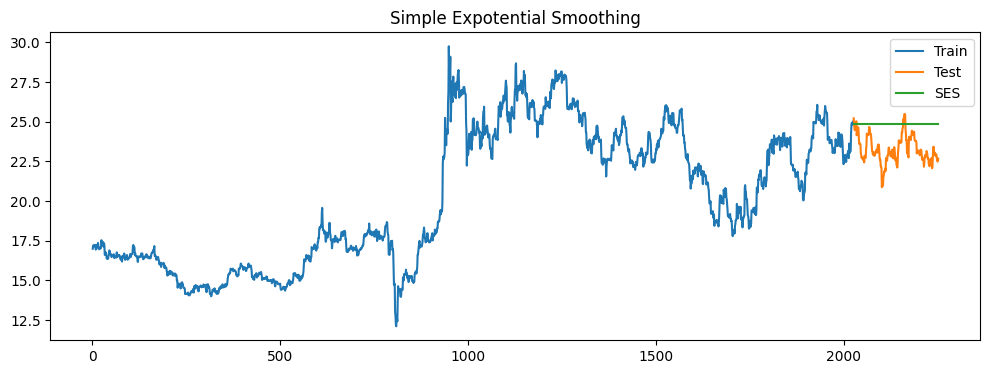

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

2027    24.874525
2028    24.874525
2029    24.874525
2030    24.874525
2031    24.874525
          ...    
2278    24.874525
2279    24.874525
2280    24.874525
2281    24.874525
2282    24.874525
Length: 256, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 1.824712874225399
MAPE: 7.203500672288548%
MAE: 1.6449567251819692


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
def SES(train, test):
  alpha_values = np.arange(0.01, 1.0, 0.01)
  model1 = SimpleExpSmoothing(train)
  test_data = test.copy()
  rmse_scores = {}
  mape_scores = {}
  mae_scores = {}
  for alpha in alpha_values:
    fit1 = model1.fit(smoothing_level = alpha, optimized = False)
    test_data['test_data_forecast'] = fit1.forecast(len(test))
    rmse = calculate_rmse(test, test_data['test_data_forecast'])
    rmse_scores[alpha] = rmse
    mape = calculate_mape(test, test_data['test_data_forecast'])
    mape_scores[alpha] = mape
    mae = calculate_mae(test, test_data['test_data_forecast'])
    mae_scores[alpha] = mae
  best_alpha1 = min(rmse_scores, key=rmse_scores.get)
  print(f'Best alpha for RMSE: {best_alpha1}, RMSE: {rmse_scores[best_alpha1]}')
  best_alpha2 = min(mape_scores, key=mape_scores.get)
  print(f'Best alpha for MAPE: {best_alpha2}, MAPE: {mape_scores[best_alpha2]}')
  best_alpha3 = min(mae_scores, key=mae_scores.get)
  print(f'Best alpha for MAE: {best_alpha3}, MAE: {mae_scores[best_alpha3]}')


SES(train, test)

Best alpha for RMSE: 0.01, RMSE: 0.8456731062956512
Best alpha for MAPE: 0.01, MAPE: 2.9451580051321504
Best alpha for MAE: 0.01, MAE: 0.6854548258995572


## Chia dữ liệu train, test 7:3

In [ ]:
train = new_df.iloc[:1576]
test = new_df.iloc[1576:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                      16.993771
 2                      17.196475
 3                      17.112426
 4                      17.200338
 5                      17.220985
 ...                          ...
 1572                   24.655900
 1573                   24.113000
 1574                   24.164000
 1575                   24.116000
 1576                   23.667000
 
 [1576 rows x 1 columns],
       Value (USD per troy ounce)
 1577                   23.686000
 1578                   23.318000
 1579                   23.155000
 1580                   22.740000
 1581                   22.751000
 ...                          ...
 2248                   22.800718
 2249                   22.558054
 2250                   22.486938
 2251                   22.507808
 2252                   22.676529
 
 [676 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.4
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
1577,23.686000,24.066227
1578,23.318000,24.066227
1579,23.155000,24.066227
1580,22.740000,24.066227
1581,22.751000,24.066227
...,...,...
2248,22.800718,24.066227
2249,22.558054,24.066227
2250,22.486938,24.066227
2251,22.507808,24.066227


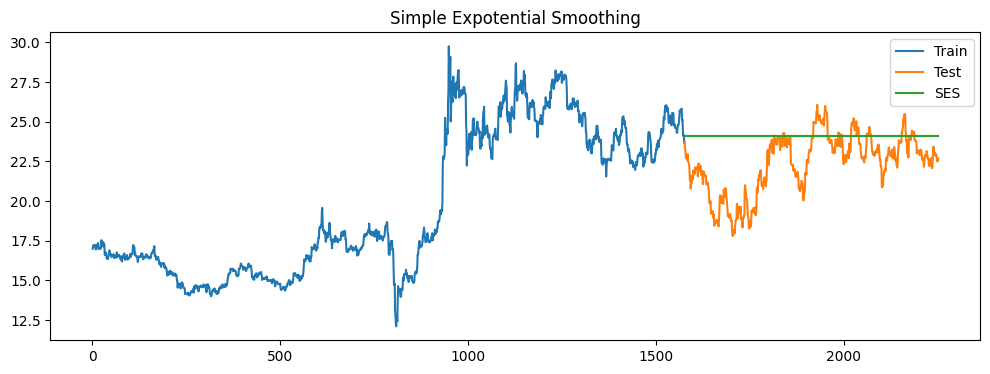

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

1577    24.066227
1578    24.066227
1579    24.066227
1580    24.066227
1581    24.066227
          ...    
2278    24.066227
2279    24.066227
2280    24.066227
2281    24.066227
2282    24.066227
Length: 706, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 2.523975957770327
MAPE: 9.3123546367381%
MAE: 1.9289222224126246


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.99, RMSE: 2.274675347584898
Best alpha for MAPE: 0.99, MAPE: 8.194779598042965
Best alpha for MAE: 0.99, MAE: 1.6964872368234176


#Dữ liệu giá bạch kim

In [ ]:
# Đường dẫn tới các file csv
file_path = '/content/drive/MyDrive/PTDLKD_Dataset/platium_price_2018_2024.csv'

df = pd.read_csv(file_path)
# In ra bộ dữ liệu
print(df)

            Date  Value (USD per troy ounce)
0     2018-01-01                  930.030587
1     2018-01-02                  944.375754
2     2018-01-03                  954.910273
3     2018-01-04                  960.864535
4     2018-01-05                  969.196081
...          ...                         ...
2247  2024-02-26                  899.357490
2248  2024-02-27                  884.772925
2249  2024-02-28                  893.184032
2250  2024-02-29                  884.441915
2251  2024-03-01                  882.441964

[2252 rows x 2 columns]


Vẽ biểu đồ plot cho dữ liệu

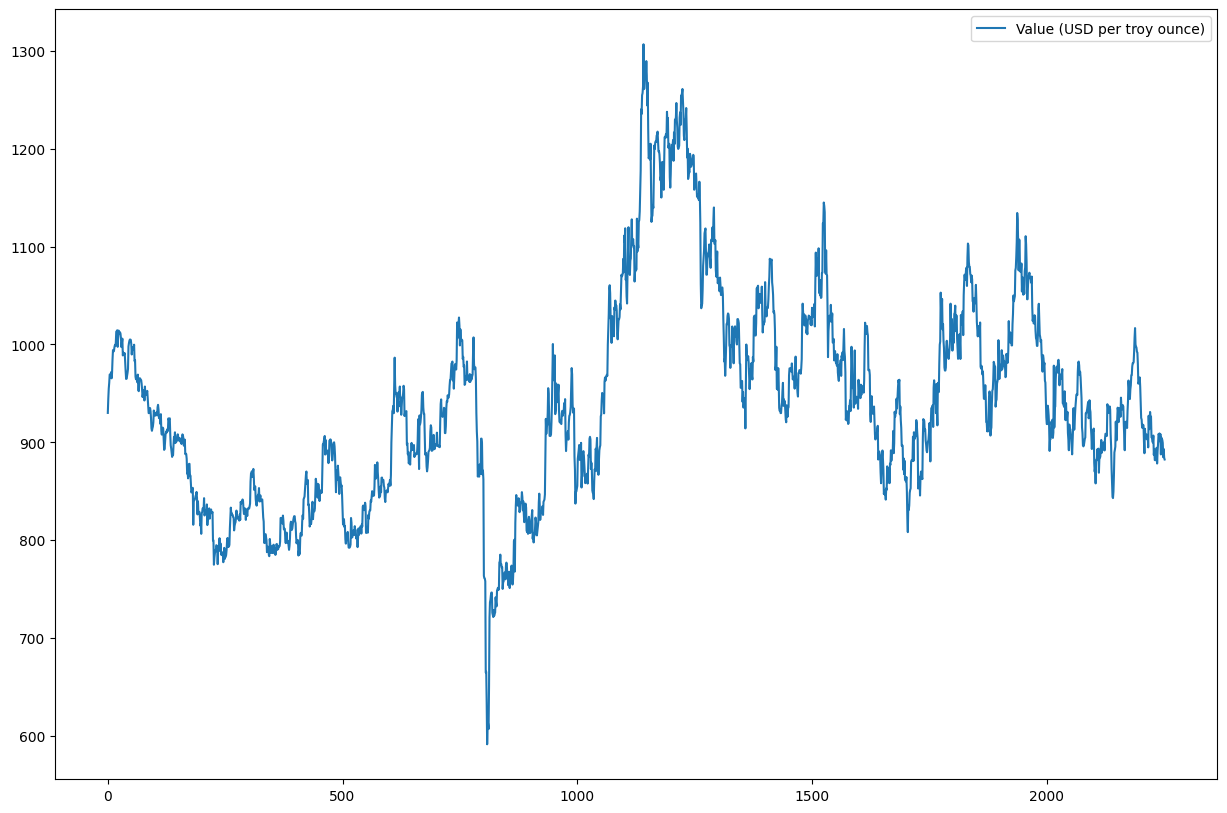

In [ ]:
df.plot(figsize=(15,10))
plt.show()

Thêm index cho dữ liệu

In [ ]:
df.index += 1
df

,Date,Value (USD per troy ounce)
1,2018-01-01,930.030587
2,2018-01-02,944.375754
3,2018-01-03,954.910273
4,2018-01-04,960.864535
5,2018-01-05,969.196081
...,...,...
2248,2024-02-26,899.357490
2249,2024-02-27,884.772925
2250,2024-02-28,893.184032
2251,2024-02-29,884.441915


In [ ]:
# Tạo một DataFrame mới từ DataFrame hiện có mà không có cột 'Date'
new_df = df.drop(columns=['Date'])

# In ra DataFrame mới
print(new_df)

      Value (USD per troy ounce)
1                     930.030587
2                     944.375754
3                     954.910273
4                     960.864535
5                     969.196081
...                          ...
2248                  899.357490
2249                  884.772925
2250                  893.184032
2251                  884.441915
2252                  882.441964

[2252 rows x 1 columns]


## Chia dữ liệu train, test 8:2

In [ ]:
train = new_df.iloc[:1800]
test = new_df.iloc[1800:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                     930.030587
 2                     944.375754
 3                     954.910273
 4                     960.864535
 5                     969.196081
 ...                          ...
 1796                 1041.649957
 1797                 1017.300000
 1798                 1015.730001
 1799                 1025.945021
 1800                  993.700041
 
 [1800 rows x 1 columns],
       Value (USD per troy ounce)
 1801                 1006.410027
 1802                 1004.430039
 1803                 1001.744739
 1804                 1031.318247
 1805                 1031.935515
 ...                          ...
 2248                  899.357490
 2249                  884.772925
 2250                  893.184032
 2251                  884.441915
 2252                  882.441964
 
 [452 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.03
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
1801,1006.410027,966.850986
1802,1004.430039,966.850986
1803,1001.744739,966.850986
1804,1031.318247,966.850986
1805,1031.935515,966.850986
...,...,...
2248,899.357490,966.850986
2249,884.772925,966.850986
2250,893.184032,966.850986
2251,884.441915,966.850986


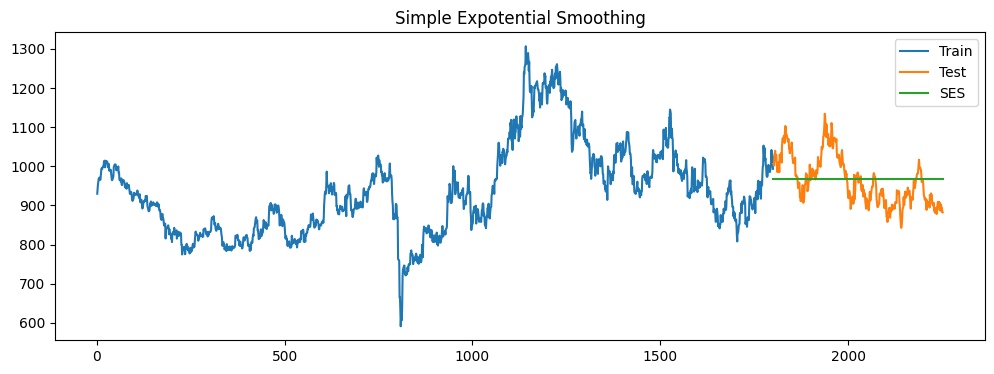

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

1801    966.850986
1802    966.850986
1803    966.850986
1804    966.850986
1805    966.850986
           ...    
2278    966.850986
2279    966.850986
2280    966.850986
2281    966.850986
2282    966.850986
Length: 482, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 61.43405294729416
MAPE: 5.343558450568606%
MAE: 51.711683445263766


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.03, RMSE: 61.43405294729416
Best alpha for MAPE: 0.01, MAPE: 5.166558667310204
Best alpha for MAE: 0.02, MAE: 50.98460474181415


## Chia dữ liệu train, test 9:1

In [ ]:
train = new_df.iloc[:2026]
test = new_df.iloc[2026:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                     930.030587
 2                     944.375754
 3                     954.910273
 4                     960.864535
 5                     969.196081
 ...                          ...
 2022                  977.320018
 2023                  973.000028
 2024                  971.285027
 2025                  983.520040
 2026                  984.294983
 
 [2026 rows x 1 columns],
       Value (USD per troy ounce)
 2027                  979.096198
 2028                  958.263045
 2029                  968.101913
 2030                  969.148326
 2031                  965.381143
 ...                          ...
 2248                  899.357490
 2249                  884.772925
 2250                  893.184032
 2251                  884.441915
 2252                  882.441964
 
 [226 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.03
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
2027,979.096198,974.324818
2028,958.263045,974.324818
2029,968.101913,974.324818
2030,969.148326,974.324818
2031,965.381143,974.324818
...,...,...
2248,899.357490,974.324818
2249,884.772925,974.324818
2250,893.184032,974.324818
2251,884.441915,974.324818


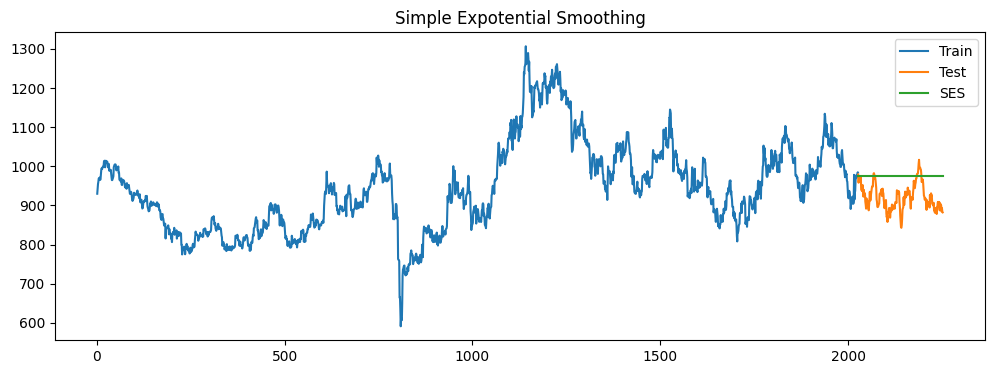

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

2027    974.324818
2028    974.324818
2029    974.324818
2030    974.324818
2031    974.324818
           ...    
2278    974.324818
2279    974.324818
2280    974.324818
2281    974.324818
2282    974.324818
Length: 256, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 61.91298205394614
MAPE: 6.0801056411364485%
MAE: 55.01406748227247


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.08, RMSE: 46.065312294598804
Best alpha for MAPE: 0.08, MAPE: 4.4194102284609915
Best alpha for MAE: 0.08, MAE: 40.036146534132875


## Chia dữ liệu train, test 7:3

In [ ]:
train = new_df.iloc[:1576]
test = new_df.iloc[1576:]

In [ ]:
train, test

(      Value (USD per troy ounce)
 1                     930.030587
 2                     944.375754
 3                     954.910273
 4                     960.864535
 5                     969.196081
 ...                          ...
 1572                  971.700014
 1573                  922.929993
 1574                  928.370032
 1575                  931.979999
 1576                  922.129995
 
 [1576 rows x 1 columns],
       Value (USD per troy ounce)
 1577                  922.859980
 1578                  918.720014
 1579                  920.029982
 1580                  936.980035
 1581                  936.980035
 ...                          ...
 2248                  899.357490
 2249                  884.772925
 2250                  893.184032
 2251                  884.441915
 2252                  882.441964
 
 [676 rows x 1 columns])

Khởi tạo SimpleExpSmoothing

In [ ]:
model = SimpleExpSmoothing(train)

Chọn bất kỳ hệ số alpha và train model

In [ ]:
alpha = 0.03
fit = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
test_data = test.copy()
test_data['test_data_forecast'] = fit.forecast(len(test))
test_data

,Value (USD per troy ounce),test_data_forecast
1577,922.859980,999.873842
1578,918.720014,999.873842
1579,920.029982,999.873842
1580,936.980035,999.873842
1581,936.980035,999.873842
...,...,...
2248,899.357490,999.873842
2249,884.772925,999.873842
2250,893.184032,999.873842
2251,884.441915,999.873842


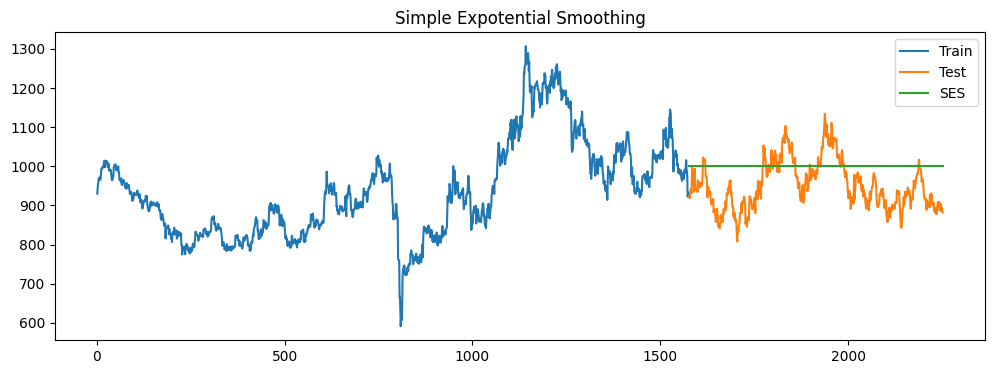

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Value (USD per troy ounce)'], label='Train')
plt.plot(test['Value (USD per troy ounce)'], label='Test')
plt.plot(test_data['test_data_forecast'], label='SES')

plt.legend(loc='best')
plt.title('Simple Expotential Smoothing')
plt.show()

In [ ]:
forecast = fit.forecast(len(test)+30)
forecast

1577    999.873842
1578    999.873842
1579    999.873842
1580    999.873842
1581    999.873842
           ...    
2278    999.873842
2279    999.873842
2280    999.873842
2281    999.873842
2282    999.873842
Length: 706, dtype: float64

In [ ]:
actual = test
forecast = test_data['test_data_forecast']

rmse = calculate_rmse(actual, forecast)
mape = calculate_mape(actual, forecast)
mae = calculate_mae(actual, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"MAE: {mae}")

RMSE: 77.93906958530484
MAPE: 7.266069345847913%
MAE: 67.08070976601662


Hàm chọn hệ số alpha tốt nhất cho mô hình SES

In [ ]:
SES(train, test)

Best alpha for RMSE: 0.2, RMSE: 60.88177772618684
Best alpha for MAPE: 0.36000000000000004, MAPE: 5.03948619460303
Best alpha for MAE: 0.32, MAE: 48.96361244448876
